#Tiempo de Inicio

In [ ]:
import time
start_time = time.time()

# Librerías utilizadas

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip #Reiniciar Kernel
!pip install chart_studio
!pip install tabulate

     / 17.8 MB 25.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.8/395.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 19.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 54.2 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357555 sha256=49cdcc9c05c6f71d228700f0de50d783b51b56eaddacb08791813169b1ccc4bd
  Stored in directory: /tmp/pip-ephem-wheel-cache-mf0jza94/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=789484f

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import chart_studio.plotly as py
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn import metrics
import missingno as msno
import pandas_profiling
from tabulate import tabulate
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

import warnings
warnings.filterwarnings('ignore')

<ipython-input-3-89a838eb711f>:20: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


# Dataset

## Visualización del Dataset crudo

In [ ]:
# Traemos el dataset desde Github y le asignamos la variable "df"
# ==============================================================================
url = "https://raw.githubusercontent.com/LAUGOD/Videogames-Dataset/main/video_games_sales.csv"
df = pd.read_csv (url)
df.head(5)

Name Platform  Year_of_Release         Genre Publisher  \
0                Wii Sports      Wii           2006.0        Sports  Nintendo   
1         Super Mario Bros.      NES           1985.0      Platform  Nintendo   
2            Mario Kart Wii      Wii           2008.0        Racing  Nintendo   
3         Wii Sports Resort      Wii           2009.0        Sports  Nintendo   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  Critic_Score  \
0     41.36     28.96      3.77         8.45         82.53          76.0   
1     29.08      3.58      6.81         0.77         40.24           NaN   
2     15.68     12.76      3.79         3.29         35.52          82.0   
3     15.61     10.93      3.28         2.95         32.77          80.0   
4     11.27      8.89     10.22         1.00         31.37           NaN   

   Critic_Count User_Score  User_Count Developer Rating  
0          51.0          8       322.0  Nintendo      E  
1           NaN        NaN         NaN       NaN    NaN  
2          73.0        8.3       709.0  Nintendo      E  
3          73.0          8       192.0  Nintendo      E  
4           NaN        NaN         NaN       NaN    NaN

In [ ]:
# Verificamos tamaño y tipo de las columnas
# ==============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Data Wrangling

<Axes: >

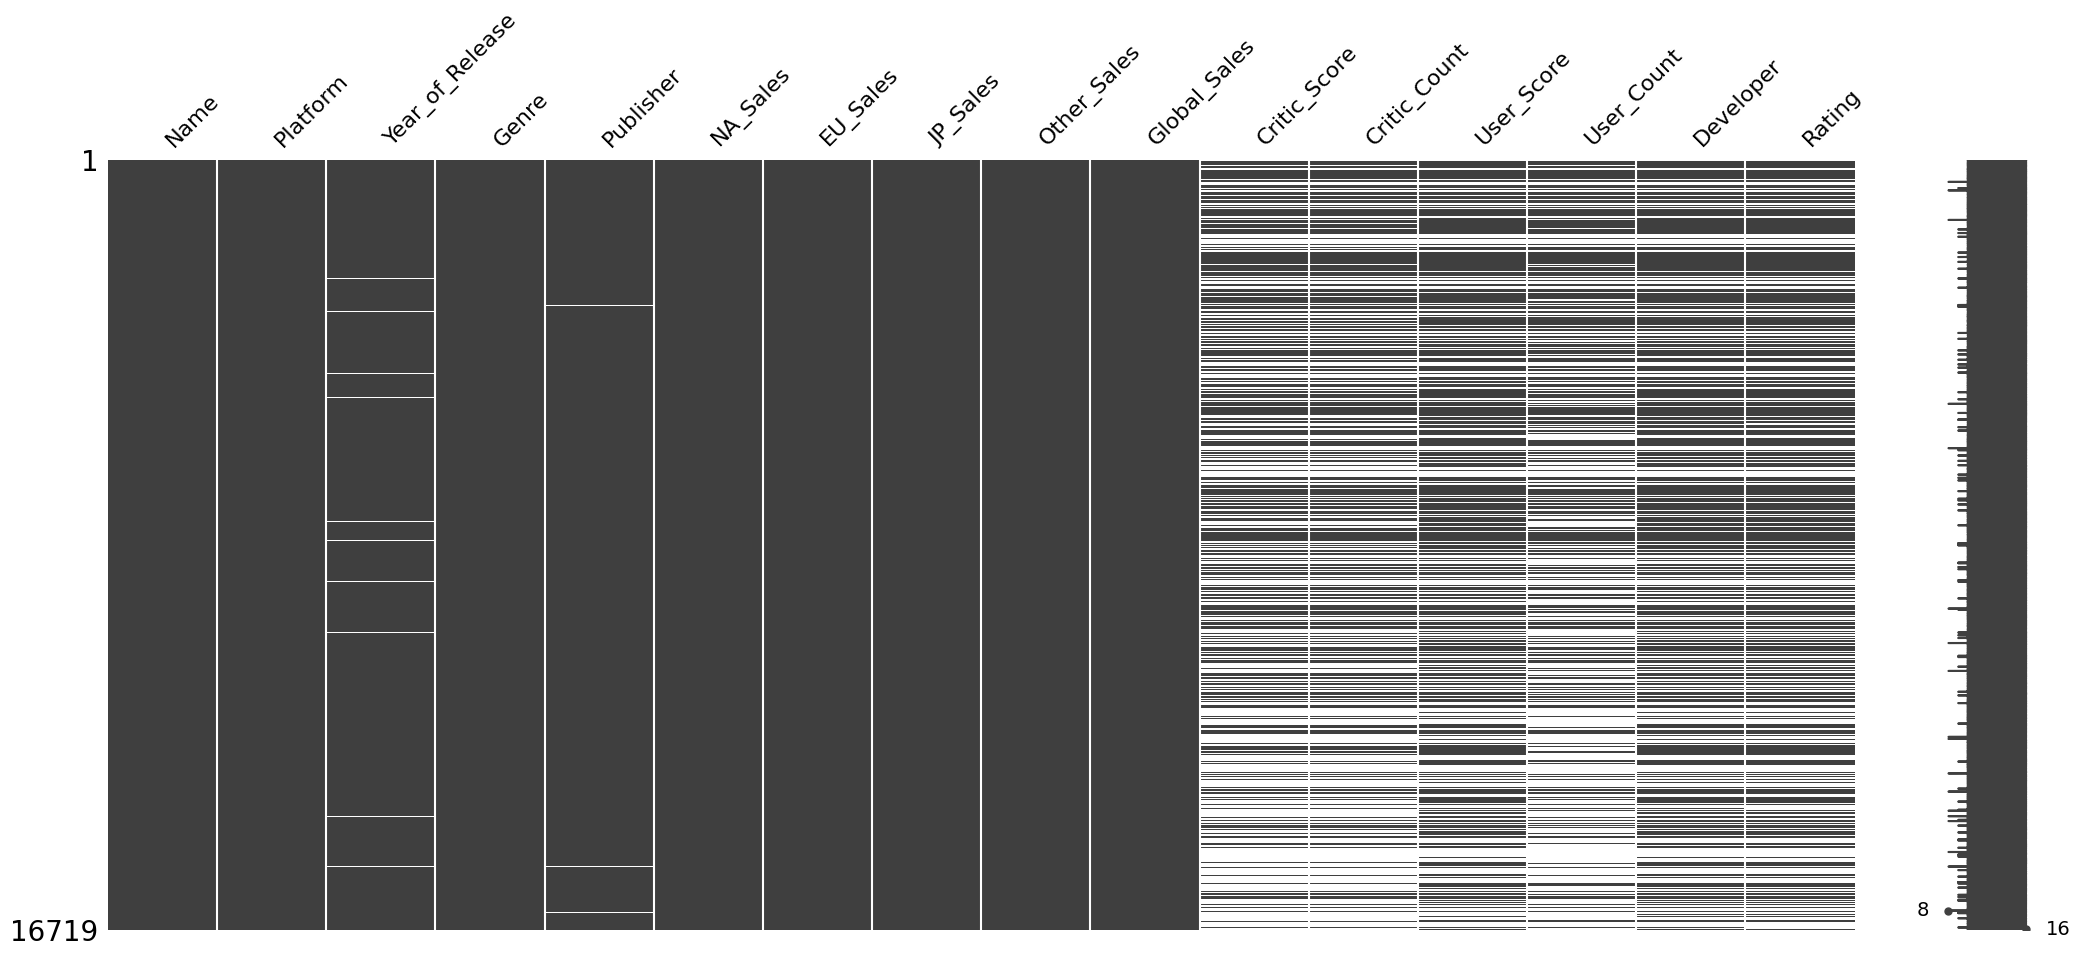

In [ ]:
# Verificamos los valores perdidos de cada columna, de forma visual
# ==============================================================================
msno.matrix(df)

In [ ]:
# Eliminamos las columnas que no manipularemos
# ==============================================================================
col_del = ["Developer", "User_Count", "User_Score", "Critic_Score", "Critic_Count"] # Se eliminan por exceso de nulos
df = df.drop(labels=col_del, axis=1)

In [ ]:
# Buscamos rellenar los valores de "Rating" con cálculos de moda
# ==============================================================================
# Agrupamos "Genre" y "Publisher", y calculamos la moda de "Rating"
mode_rating_by_genre_publisher = df.groupby(['Genre', 'Publisher'])['Rating'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Calculamos la moda de "Rating" basada en "Genre"
mode_rating_by_genre = df.groupby('Genre')['Rating'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else None)

# Llenamos "Rating" en base a los resultados obtenidos
def impute_rating(row):
    genre = row['Genre']
    publisher = row['Publisher']
    if pd.isnull(genre):
        return row['Rating']
    else:
        mode_rating = mode_rating_by_genre_publisher.get((genre, publisher), None)
        if mode_rating is not None:
            return mode_rating
        else:
            # Si no hay una moda específica para Genre-Publisher, usamos la moda de Genre
            return mode_rating_by_genre.get(genre, row['Rating'])

# Aplicamos los datos encontrados
df['Rating'] = df.apply(impute_rating, axis=1)

In [ ]:
# Quedan nulos en Year_of_Release y en Publisher principalmente
# ==============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Rating           16717 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [ ]:
# Si bien los publishers tienden a ser los mismos, no es que sacar una media, mediana o moda sea lo más indicado para llenar los valores nulos
# Lo mismo sucede en Year_of_Release, y todo es debido precisamente a la gran variación de años que existe.
# Por ende, la mejor opción sería deshacernos de los null en su totalidad, incluidos los 2 valores de "Name" que no estamos viendo.
# ==============================================================================
df = df.dropna()

In [ ]:
# Reducimos aproximadamente unas 303 lineas y podemos trabajar sin incomodidades ni incongruencias con los valores restantes.
# ==============================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16416 entries, 0 to 16718
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16416 non-null  object 
 1   Platform         16416 non-null  object 
 2   Year_of_Release  16416 non-null  float64
 3   Genre            16416 non-null  object 
 4   Publisher        16416 non-null  object 
 5   NA_Sales         16416 non-null  float64
 6   EU_Sales         16416 non-null  float64
 7   JP_Sales         16416 non-null  float64
 8   Other_Sales      16416 non-null  float64
 9   Global_Sales     16416 non-null  float64
 10  Rating           16416 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [ ]:
# Como dato, existen valores repetidos dentro de "Name", debido a que algunos títulos son lanzados en diferentes plataformas
# ==============================================================================
valores_repetidos = df.loc[df['Name'].duplicated(), 'Name']
len(valores_repetidos)

5019

In [ ]:
# 5019 de los valores de "Name", son títulos repetidos
# En total, dentro de esos 5019, solo 2749 son juegos únicos
# ==============================================================================
unicos_repetidos = valores_repetidos.unique()
len(unicos_repetidos)

2749

## Variables Sintéticas

In [ ]:
# Simplificamos "Platforms"
# ==============================================================================
# Categorizamos las plataformas en 3 sectores, para una más fácil comprensión de datos
df['Platform_Category'] = df['Platform'].apply(lambda platform: "PC" if platform == "PC" else ("Portable" if platform in ["DS", "PSP", "3DS", "PSV", "GB", "GBA"] else "Console"))

# Simplificamos "Global_Sales"
# ==============================================================================
# Calculamos el promedio de ventas globales
average_sales = df['Global_Sales'].mean()

# Definimos los umbrales basados en porcentajes
low_sales_treshold = 0.7 * average_sales  # 70% del promedio
high_sales_treshold = 1.3 * average_sales  # 130% del promedio

# Creaamos la variable "Sales_Category" con los umbrales basados en porcentajes
df['Sales_Category'] = pd.cut(df['Global_Sales'], bins=[-float('inf'), low_sales_treshold, high_sales_treshold, float('inf')],
                               labels=["Low Sales", "Moderated Sales", "High Sales"])

In [ ]:
#Verificamos el tamaño final del dataset
# ==============================================================================
df.shape

(16416, 13)

## Data Profiling

In [ ]:
# Utilizando Pandas Profiling, podemos chequear métricas sencillas
# ==============================================================================
profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Desarrollo

## Gráficos/tablas/insights

### Consumo por región

              Global_Sales   NA_Sales   EU_Sales   JP_Sales  Other_Sales
Genre                                                                   
Action           19.494927   9.796949   5.799719   1.817583     2.068191
Sports           14.872880   7.618096   4.214582   1.531451     1.500579
Shooter          11.824734   6.637800   3.569791   0.439017     1.172792
Role-Playing     10.565682   3.745942   2.136517   4.011532     0.674301
Platform          9.373482   5.044378   2.263069   1.483554     0.578962
Misc              8.889179   4.472000   2.367035   1.214673     0.828547
Racing            8.213856   4.050348   2.661340   0.642749     0.857036
Fighting          5.023835   2.502781   1.123647   0.990625     0.407123
Simulation        4.406283   2.050598   1.284476   0.722312     0.347195
Puzzle            2.727737   1.374821   0.565001   0.643316     0.139605
Adventure         2.647379   1.150773   0.716750   0.592695     0.185799
Strategy          1.960025   0.768279   0.507230   

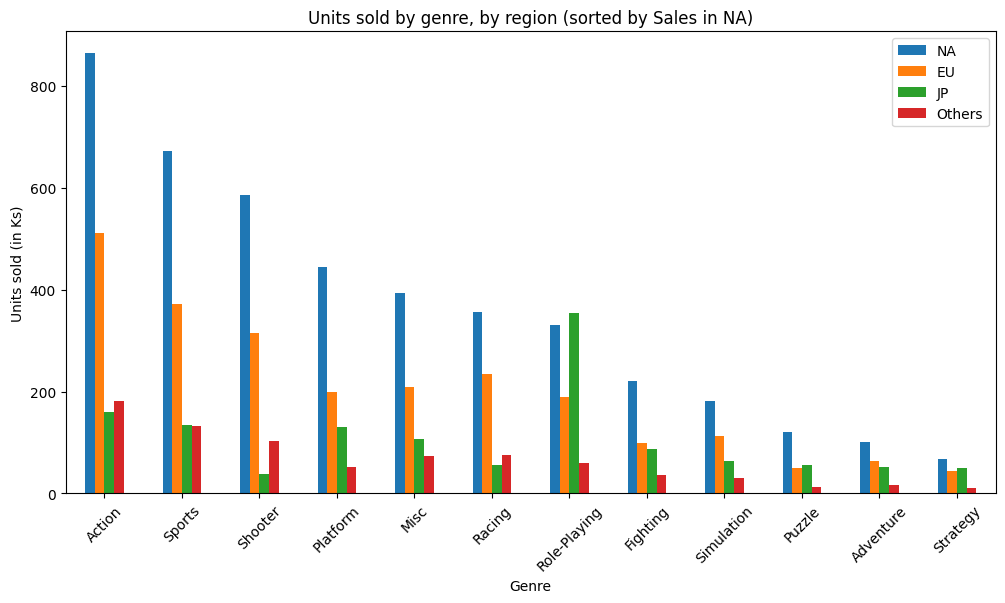

In [ ]:
# Gráficos y tablas

# Consumo de géneros por región (Tabla)
# ==============================================================================
# Se consigue el total de "Global_Sales"
total_global_sales = df['Global_Sales'].sum()

# Conseguimos el porcentaje de impacto de cada género, por región en base a "Global_Sales"
percentage_results = df.groupby('Genre').agg({
    'Global_Sales': lambda x: (x.sum() / total_global_sales) * 100,
    'NA_Sales': lambda x: (x.sum() / total_global_sales) * 100,
    'EU_Sales': lambda x: (x.sum() / total_global_sales) * 100,
    'JP_Sales': lambda x: (x.sum() / total_global_sales) * 100,
    'Other_Sales': lambda x: (x.sum() / total_global_sales) * 100
}).sort_values(by='Global_Sales', ascending=False)

# Agregamos una variable con los resultados de los porcentajes
total_percentage = percentage_results.sum()

# Creamos una fila "Total" y la colocamos dentro de "resultados_porcentaje", visualizando más fácilmente el impacto por región
percentage_results.loc['Total'] = total_percentage

# Imprimimos una tabla de porcentajes mostrando la influencia en el mercado de cada sector correspondiente a cada género
print(percentage_results)


# Consumo de géneros por región ordenados por "NA_Sales" (Gráfico)
# ==============================================================================
# Filtramos el DataFrame para incluir solo las columnas relevantes
sales_by_region_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Ordenamos por ventas en la región de NA en orden descendente
sales_by_region_genre = sales_by_region_genre.sort_values(by='NA_Sales', ascending=False)

# Creamos un gráfico de barras no apiladas
sales_by_region_genre.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Units sold by genre, by region (sorted by Sales in NA)')
plt.ylabel('Units sold (in Ks)')
plt.xlabel('Genre')
plt.xticks(rotation=45)
plt.legend(["NA", "EU", "JP", "Others"])
plt.show()

### Top 10 juegos vendidos por región


Top 10 Global
╒════╤═══════════════════════════╤═══════════════════╤════════════╤══════════════╤════════════════╕
│    │ Name                      │   Year_of_Release │ Platform   │ Genre        │   Global_Sales │
╞════╪═══════════════════════════╪═══════════════════╪════════════╪══════════════╪════════════════╡
│  0 │ Wii Sports                │              2006 │ Wii        │ Sports       │          82.53 │
├────┼───────────────────────────┼───────────────────┼────────────┼──────────────┼────────────────┤
│  1 │ Super Mario Bros.         │              1985 │ NES        │ Platform     │          40.24 │
├────┼───────────────────────────┼───────────────────┼────────────┼──────────────┼────────────────┤
│  2 │ Mario Kart Wii            │              2008 │ Wii        │ Racing       │          35.52 │
├────┼───────────────────────────┼───────────────────┼────────────┼──────────────┼────────────────┤
│  3 │ Wii Sports Resort         │              2009 │ Wii        │ Sports       │   

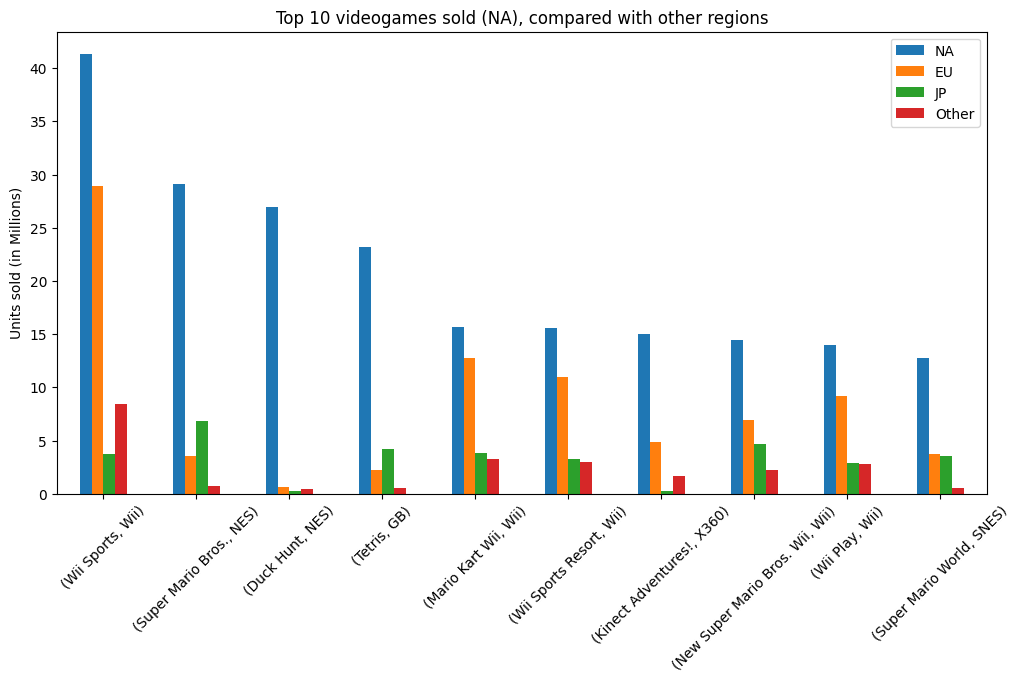

In [ ]:
# Top 10 Global
Global = df.nlargest(10, 'Global_Sales')[["Name", "Year_of_Release","Platform", "Genre", "Global_Sales"]]
print("\nTop 10 Global") #Título
print(tabulate(Global, headers='keys', tablefmt='fancy_grid')) #En formato grilla para mayor claridad

# Top 10 NA
NA = df.nlargest(10, 'NA_Sales')[["Name", "Year_of_Release", "Platform", "Genre", "NA_Sales"]]
print("\nTop 10 NA")
print(tabulate(NA, headers='keys', tablefmt='fancy_grid'))

# Top 10 EU
EU = df.nlargest(10, 'EU_Sales')[["Name", "Year_of_Release", "Platform", "Genre", "EU_Sales"]]
print("\nTop 10 EU")
print(tabulate(EU, headers='keys', tablefmt='fancy_grid'))

# Top 10 JP
JP = df.nlargest(10, 'JP_Sales')[["Name", "Year_of_Release", "Platform", "Genre", "JP_Sales"]]
print("\nTop 10 JP")
print(tabulate(JP, headers='keys', tablefmt='fancy_grid'))

# Top 10 Other
Other = df.nlargest(10, 'Other_Sales')[["Name", "Year_of_Release",  "Platform", "Genre", "Other_Sales"]]
print("\nTop 10 Other")
print(tabulate(Other, headers='keys', tablefmt='fancy_grid'))

# Comparación Top 10 (NA) en otras regiones (Gráfico)
# ==============================================================================
# Filtramos para obtener columnas deseadas
top_na_compared = df.groupby(['Name', 'Platform'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Ordenamos lo obtenido en "NA_Sales" por orden descendente
top_na_compared= top_na_compared.sort_values(by='NA_Sales', ascending=False)

# Obtenemos el top 10
top_10 = top_na_compared.head(10)

# Creamos un barplot vertical no apilado para ver la comparación de regiones
top_10.plot(kind='bar', stacked=False, figsize=(12, 6))
plt.title('Top 10 videogames sold (NA), compared with other regions')
plt.ylabel('Units sold (in Millions)')
plt.xlabel('')
plt.xticks(rotation=45)
plt.legend(["NA", "EU", "JP", "Other"])
plt.show()

##PCA

In [ ]:
# Excluir la columna "Name" del dataframe
X = df.drop(columns=['Name'])

# Realiza Label Encoding en las características categóricas (incluyendo 'Genre')
label_encoder = LabelEncoder()
categorical_features = ['Platform', 'Publisher', 'Rating', 'Genre', "Sales_Category", "Platform_Category"]

for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])


In [ ]:
df.corr()

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.092346  0.003922 -0.168614     0.037686   
NA_Sales               -0.092346  1.000000  0.766539  0.451175     0.638502   
EU_Sales                0.003922  0.766539  1.000000  0.435877     0.722679   
JP_Sales               -0.168614  0.451175  0.435877  1.000000     0.291489   
Other_Sales             0.037686  0.638502  0.722679  0.291489     1.000000   
Global_Sales           -0.076337  0.941238  0.901665  0.613305     0.748907   

                 Global_Sales  
Year_of_Release     -0.076337  
NA_Sales             0.941238  
EU_Sales             0.901665  
JP_Sales             0.613305  
Other_Sales          0.748907  
Global_Sales         1.000000

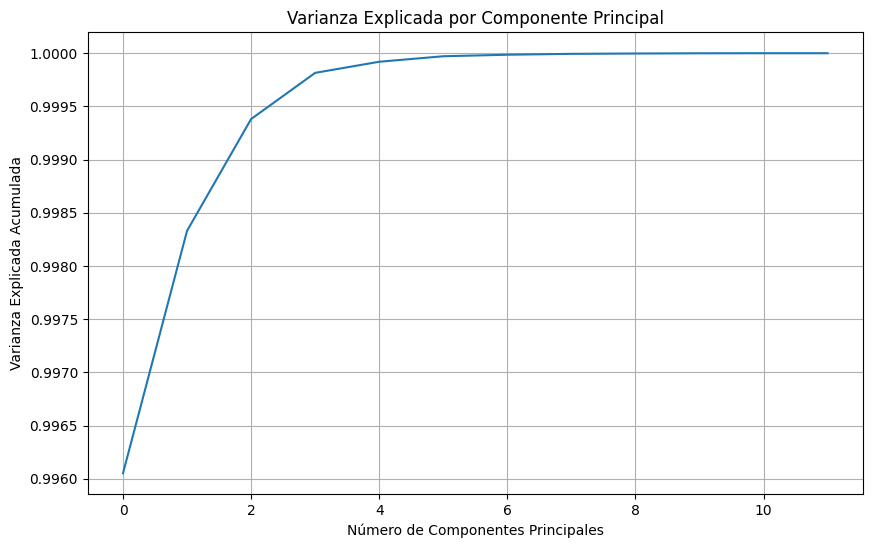

In [ ]:
# Ajustar PCA a tus datos
pca = PCA().fit(X)

# Crear un gráfico de la varianza explicada acumulada
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componente Principal')
plt.grid()
plt.show()

In [ ]:
# Inicializar PCA con el número de componentes deseados (por ejemplo, 2)
pca = PCA(n_components=2)

# Ajustar PCA a tus datos
X_reduced = pca.fit_transform(X)

# Obtener los componentes principales
components = pca.components_

# Crear un DataFrame para mostrar las características y sus cargas en los componentes
component_names = [f'Componente {i+1}' for i in range(components.shape[0])]
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance = pca.explained_variance_
loadings_df = pd.DataFrame(components, columns=X.columns, index=component_names)
loadings_df['Varianza Explicada'] = explained_variance_ratio
loadings_df['Varianza Total Explicada'] = explained_variance_ratio.cumsum()

# Mostrar las características y sus cargas en los componentes en un DataFrame
print(loadings_df)

              Platform  Year_of_Release     Genre  Publisher  NA_Sales  \
Componente 1  0.000846        -0.001032  0.001113  -0.999998 -0.000021   
Componente 2 -0.974330        -0.217157 -0.001400  -0.000619 -0.002623   

              EU_Sales  JP_Sales  Other_Sales  Global_Sales    Rating  \
Componente 1 -0.000034 -0.000092    -0.000014     -0.000160  0.000424   
Componente 2 -0.002671  0.003744    -0.001312     -0.002855 -0.013922   

              Platform_Category  Sales_Category  Varianza Explicada  \
Componente 1          -0.000211       -0.000007            0.996052   
Componente 2           0.057358        0.000660            0.002279   

              Varianza Total Explicada  
Componente 1                  0.996052  
Componente 2                  0.998331  


# Algoritmos de clasifición



## Modelo basado en "Genre"

In [ ]:
# Excluir la columna "Name" y Genre del dataframe
X = df.drop(columns=['Name', 'Genre', "Platform"])
y = df["Genre"]

# Realiza Label Encoding en las características categóricas
label_encoder = LabelEncoder()
categorical_features = ['Publisher', 'Rating', "Platform_Category", "Sales_Category"]
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)

# Define una función para evaluar un modelo
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, precision, recall, f1, confusion, report

# Lista de modelos a evaluar
models = [
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("ANN", MLPClassifier())
]

# Evaluar y comparar los modelos
for name, model in models:
    accuracy, _, _, _, _, _ = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name} - Accuracy: {accuracy:.2f}")

Random Forest - Accuracy: 0.49
SVM - Accuracy: 0.19
Gradient Boosting - Accuracy: 0.50
KNN - Accuracy: 0.48
ANN - Accuracy: 0.18


In [ ]:
"""
# Búsqueda de mejor modelo de Random Forest
# ==============================================================================

# Definimos el modelo
rf_model = RandomForestClassifier()

# Definimos la cuadrícula de hiperparámetros a buscar
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros y el modelo optimizado
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Entrenamos el modelo final con los mejores hiperparámetros
best_rf_model.fit(X_train, y_train)
# ==============================================================================
"""

"\n# Búsqueda de mejor modelo de Random Forest\n# ==============================================================================\n\n# Definimos el modelo\nrf_model = RandomForestClassifier()\n\n# Definimos la cuadrícula de hiperparámetros a buscar\nparam_grid_rf = {\n    'n_estimators': [100, 200, 300],  # Número de árboles\n    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n\n# Realizamos la búsqueda en cuadrícula con validación cruzada\ngrid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')\ngrid_search_rf.fit(X_train, y_train)\n\n# Obtenemos los mejores hiperparámetros y el modelo optimizado\nbest_params_rf = grid_search_rf.best_params_\nbest_rf_model = grid_search_rf.best_estimator_\n\n# Entrenamos el modelo final con los mejores hiperparámetros\nbest_rf_model.fit(X_train, y_train)\n# ==============================================================================\

In [ ]:
"""
# Búsqueda de mejor modelo de Gradient Boosting
# ==============================================================================

# Definimos el modelo
gb_model = GradientBoostingClassifier()

# Definimos la cuadrícula de hiperparámetros a buscar
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Número de estimadores
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [3, 4, 5]  # Profundidad máxima del árbol
}

# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros y el modelo optimizado
best_params_gb = grid_search_gb.best_params_
best_gb_model = grid_search_gb.best_estimator_

# Entrenamos el modelo final con los mejores hiperparámetros
best_gb_model.fit(X_train, y_train)
# ==============================================================================
"""

"\n# Búsqueda de mejor modelo de Gradient Boosting\n# ==============================================================================\n\n# Definimos el modelo\ngb_model = GradientBoostingClassifier()\n\n# Definimos la cuadrícula de hiperparámetros a buscar\nparam_grid_gb = {\n    'n_estimators': [100, 200, 300],  # Número de estimadores\n    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje\n    'max_depth': [3, 4, 5]  # Profundidad máxima del árbol\n}\n\n# Realizamos la búsqueda en cuadrícula con validación cruzada\ngrid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy')\ngrid_search_gb.fit(X_train, y_train)\n\n# Obtenemos los mejores hiperparámetros y el modelo optimizado\nbest_params_gb = grid_search_gb.best_params_\nbest_gb_model = grid_search_gb.best_estimator_\n\n# Entrenamos el modelo final con los mejores hiperparámetros\nbest_gb_model.fit(X_train, y_train)\n# ==============================================================================\n"

In [ ]:
# Lista de modelos a evaluar
models = [
    ("Random Forest", RandomForestClassifier(min_samples_split=10, n_estimators=300, random_state=49)),
    ("Gradient Boosting", GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=49)),
]

# Evaluar y comparar los modelos
for name, model in models:
    accuracy, precision, recall, f1, confusion, report = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name} - Metrics")
    print("==================================================================")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1: {f1:.2f}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{report}")
    print("==================================================================")

Random Forest - Metrics
Accuracy: 0.50
Precision: 0.50
Recall: 0.50
f1: 0.49
Confusion Matrix:
[[455   6  19  23   9   6  12  54  33   5  12   4]
 [ 43 116   0  21   7   8  11   8  16   5  27   8]
 [ 43   1  60   4   0   0   0  38   6   1   3   1]
 [ 30  24   7 142  13  13  20  18   4  14  65   1]
 [ 38   8   8  11  51   5  15   8   1   4  24   1]
 [ 10   5   0  19   8  28  11   5   0   7  33   0]
 [ 25   7   2  15  19  12  85   2   0   5  79   1]
 [ 70   2  20  18   5   1   0 120  21   1  12  14]
 [ 64   1  10   9   0   1   0   9 172   2   0   1]
 [ 27  11   0  15   8  11  13  10   0  46  30   4]
 [  9  10   0  22   7  12  47   4   0   6 329   1]
 [ 31   5   7   5   3   1   4  17   9   6   6  47]]
Classification Report:
              precision    recall  f1-score   support

      Action       0.54      0.71      0.61       638
   Adventure       0.59      0.43      0.50       270
    Fighting       0.45      0.38      0.41       157
        Misc       0.47      0.40      0.43       35

## Modelo basado en "Sales_Category"

In [ ]:
# Buscamos los modelos con mayor accuracy
# ==============================================================================

# Excluir la columna "Name" y Genre del dataframe
X = df.drop(columns=['Name', 'Global_Sales', "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Sales_Category"])
y = df["Sales_Category"]

# Realiza Label Encoding en las características categóricas
label_encoder = LabelEncoder()
categorical_features = ["Platform", 'Publisher', 'Rating', "Genre", "Platform_Category"]
for feature in categorical_features:
    X[feature] = label_encoder.fit_transform(X[feature])

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, precision, recall, f1, confusion, report

# Lista de modelos a evaluar
models = [
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("KNN", KNeighborsClassifier()),
    ("ANN", MLPClassifier())
]

# Evaluar y comparar los modelos
for name, model in models:
    accuracy, _, _, _, _, _ = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name} - Accuracy: {accuracy:.2f}")

Random Forest - Accuracy: 0.69
SVM - Accuracy: 0.69
Gradient Boosting - Accuracy: 0.72
KNN - Accuracy: 0.69
ANN - Accuracy: 0.69


In [ ]:
"""
# Búsqueda de mejor modelo de Random Forest
# ==============================================================================

# Definimos el modelo
rf_model = RandomForestClassifier()

# Definimos la cuadrícula de hiperparámetros a buscar
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros y el modelo optimizado
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Entrenamos el modelo final con los mejores hiperparámetros
best_rf_model.fit(X_train, y_train)
# ==============================================================================
"""

"\n# Búsqueda de mejor modelo de Random Forest\n# ==============================================================================\n\n# Definimos el modelo\nrf_model = RandomForestClassifier()\n\n# Definimos la cuadrícula de hiperparámetros a buscar\nparam_grid_rf = {\n    'n_estimators': [100, 200, 300],  # Número de árboles\n    'max_depth': [None, 10, 20, 30],  # Profundidad máxima del árbol\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4]\n}\n\n# Realizamos la búsqueda en cuadrícula con validación cruzada\ngrid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')\ngrid_search_rf.fit(X_train, y_train)\n\n# Obtenemos los mejores hiperparámetros y el modelo optimizado\nbest_params_rf = grid_search_rf.best_params_\nbest_rf_model = grid_search_rf.best_estimator_\n\n# Entrenamos el modelo final con los mejores hiperparámetros\nbest_rf_model.fit(X_train, y_train)\n# ==============================================================================\

In [ ]:
"""
# Búsqueda de mejor modelo de Gradient Boosting
# ==============================================================================

# Definimos el modelo
gb_model = GradientBoostingClassifier()

# Definimos la cuadrícula de hiperparámetros a buscar
param_grid_gb = {
    'n_estimators': [100, 200, 300],  # Número de estimadores
    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje
    'max_depth': [3, 4, 5]  # Profundidad máxima del árbol
}

# Realizamos la búsqueda en cuadrícula con validación cruzada
grid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)

# Obtenemos los mejores hiperparámetros y el modelo optimizado
best_params_gb = grid_search_gb.best_params_
best_gb_model = grid_search_gb.best_estimator_

# Entrenamos el modelo final con los mejores hiperparámetros
best_gb_model.fit(X_train, y_train)
# ==============================================================================
"""

"\n# Búsqueda de mejor modelo de Gradient Boosting\n# ==============================================================================\n\n# Definimos el modelo\ngb_model = GradientBoostingClassifier()\n\n# Definimos la cuadrícula de hiperparámetros a buscar\nparam_grid_gb = {\n    'n_estimators': [100, 200, 300],  # Número de estimadores\n    'learning_rate': [0.01, 0.1, 0.2],  # Tasa de aprendizaje\n    'max_depth': [3, 4, 5]  # Profundidad máxima del árbol\n}\n\n# Realizamos la búsqueda en cuadrícula con validación cruzada\ngrid_search_gb = GridSearchCV(gb_model, param_grid_gb, cv=5, scoring='accuracy')\ngrid_search_gb.fit(X_train, y_train)\n\n# Obtenemos los mejores hiperparámetros y el modelo optimizado\nbest_params_gb = grid_search_gb.best_params_\nbest_gb_model = grid_search_gb.best_estimator_\n\n# Entrenamos el modelo final con los mejores hiperparámetros\nbest_gb_model.fit(X_train, y_train)\n# ==============================================================================\n"

In [ ]:
# Obtenemos los resultados de los mejores modelos con hiperparámetros optimizados
# ==============================================================================

# Modelo a evaluar
models = [
    ("Random Forest", RandomForestClassifier(max_depth=30, min_samples_leaf=4, n_estimators=300, random_state=50)),
    ("Gradient Boosting", GradientBoostingClassifier(max_depth=4, n_estimators=300, random_state=50))
        ]

# Evaluar y comparar los modelos
for name, model in models:
    accuracy, precision, recall, f1, confusion, report = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"{name} - Metrics")
    print("==================================================================")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"f1: {f1:.2f}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{report}")
    print("==================================================================")

Random Forest - Metrics
Accuracy: 0.73
Precision: 0.66
Recall: 0.73
f1: 0.67
Confusion Matrix:
[[ 202  358   18]
 [  85 2168   20]
 [  71  348   14]]
Classification Report:
                 precision    recall  f1-score   support

     High Sales       0.56      0.35      0.43       578
      Low Sales       0.75      0.95      0.84      2273
Moderated Sales       0.27      0.03      0.06       433

       accuracy                           0.73      3284
      macro avg       0.53      0.45      0.44      3284
   weighted avg       0.66      0.73      0.67      3284

Gradient Boosting - Metrics
Accuracy: 0.73
Precision: 0.66
Recall: 0.73
f1: 0.67
Confusion Matrix:
[[ 232  328   18]
 [ 107 2142   24]
 [  76  343   14]]
Classification Report:
                 precision    recall  f1-score   support

     High Sales       0.56      0.40      0.47       578
      Low Sales       0.76      0.94      0.84      2273
Moderated Sales       0.25      0.03      0.06       433

       accuracy   

# Tiempo de fin


In [ ]:
#Verifico el tiempo de finalización
end_time = time.time()

#Mido la diferencia entre tiempo de inicio y fin
total_time = end_time - start_time

#Imprimo el tiempo total que llevó hacer todo el código en un formato más legible
print(f"Tiempo total de ejecución: {total_time:.2f} segundos")

Tiempo total de ejecución: 312.66 segundos
